<a href="https://colab.research.google.com/github/caiogasparine/AIDI1006-google-colab/blob/main/AIDI1006_moderate_content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.6 MB/s eta 0:00:00


In [2]:
# AIDI1006-moderate-content.ipynb v.2023
# Sample code 1 - using ComputerVisionClient / Cognitive Services

from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

from google.colab import drive
drive.mount('/content/drive')

# Authenticate // Authenticates your credentials and creates a client.
# subscription_key = "PASTE_YOUR_SUBSCRIPTION_KEY_HERE"
# endpoint = "PASTE_YOUR_ENDPOINT_HERE"
subscription_key = "7159977d23c14abe9254b8429040885b"
endpoint = "https://computer-vision-ai1006.cognitiveservices.azure.com/"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

# Quickstart variables // These variables are shared by several examples
local_image_path = 'c:\images\kim.jpg'
local_image_path = '/content/drive/My Drive/images/kim.jpg'
remote_image_url = "https://earlybirdcatchestheworm.files.wordpress.com/2015/08/cosmo-september-15-demi-lovato-newsstand.jpg"

#Detect Adult or Racy Content - local
#This example detects adult or racy content in a local image, then prints the adult/racy score.
#The score is ranged 0.0 - 1.0 with smaller numbers indicating negative results.

print("===== Detect Adult or Racy Content - local =====")
# Open local file
local_image = open(local_image_path, "rb")
# Select visual features you want
local_image_features = ["adult"]
# Call API with local image and features
detect_adult_results_local = computervision_client.analyze_image_in_stream(local_image, local_image_features)

# Print results with adult/racy score
print("Analyzing local image for adult or racy content ... ")
print("Is adult content: {} with confidence {:.2f}".format(detect_adult_results_local .adult.is_adult_content, detect_adult_results_local .adult.adult_score * 100))
print("Has racy content: {} with confidence {:.2f}".format(detect_adult_results_local .adult.is_racy_content, detect_adult_results_local .adult.racy_score * 100))
print()
# END - Detect Adult or Racy Content - local


# Detect Adult or Racy Content - remote
# This example detects adult or racy content in a remote image, then prints the adult/racy score.
# The score is ranged 0.0 - 1.0 with smaller numbers indicating negative results.

print("===== Detect Adult or Racy Content - remote =====")
# Select the visual feature(s) you want
remote_image_features = ["adult"]
# Call API with URL and features
detect_adult_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print results with adult/racy score
print("Analyzing remote image for adult or racy content ... ")
print("Is adult content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_adult_content, detect_adult_results_remote.adult.adult_score * 100))
print("Has racy content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_racy_content, detect_adult_results_remote.adult.racy_score * 100))
# </snippet_adult>
print()
# END - Detect Adult or Racy Content - remote

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
===== Detect Adult or Racy Content - local =====
Analyzing local image for adult or racy content ... 
Is adult content: False with confidence 9.16
Has racy content: True with confidence 96.98

===== Detect Adult or Racy Content - remote =====
Analyzing remote image for adult or racy content ... 
Is adult content: False with confidence 1.74
Has racy content: False with confidence 68.11



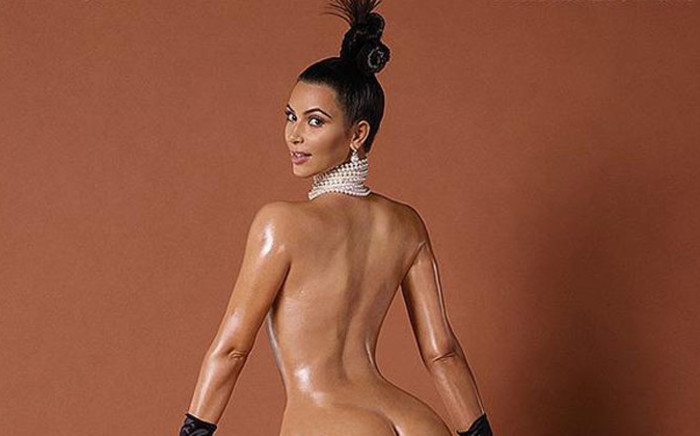

In [3]:
# Read the image stored in the Google Drive // Local image file
from google.colab.patches import cv2_imshow
import cv2 as cv
img = cv.imread(local_image_path)
cv2_imshow(img)

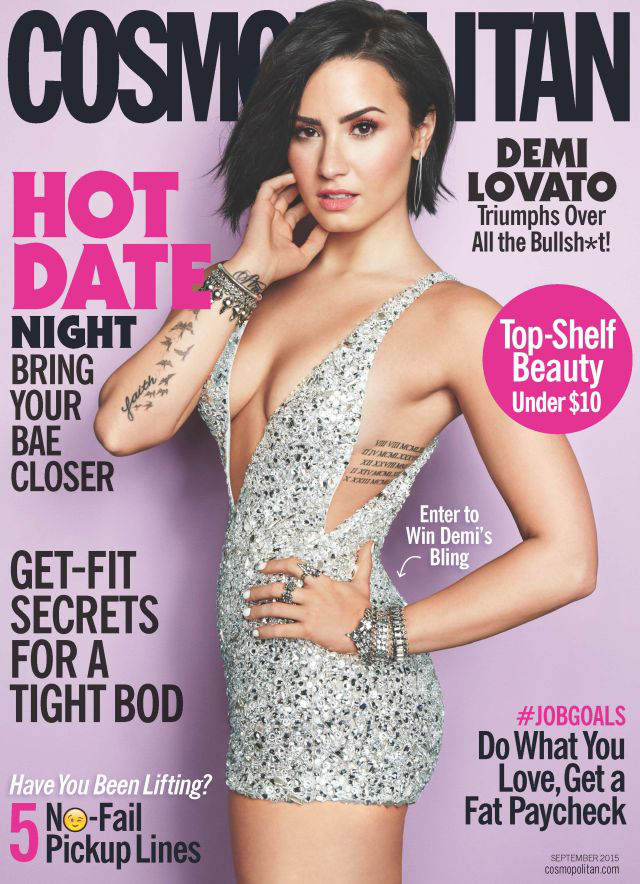

In [4]:
# Read the image URL and print the image file (URL) // Remote image
from PIL import Image
import requests
img = Image.open(requests.get(remote_image_url, stream=True).raw)
img